In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [12]:
features = dataset.feature_names

In [14]:
data = dataset.data

In [15]:
df = pd.DataFrame(data,columns=features)

In [19]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
df['Progress'] = dataset.target

In [21]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
X = df.drop('Progress',axis=1)
y= df['Progress']

In [24]:
X.shape

(442, 10)

In [25]:
y.shape

(442,)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((309, 10), (133, 10), (133,), (309,))

In [29]:
from sklearn.tree import DecisionTreeRegressor

regression = DecisionTreeRegressor()
regression.fit(X_train,y_train)


DecisionTreeRegressor()

In [30]:
params={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,25,30],
    'max_features':['sqrt', 'log2','auto']
}



In [37]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(regression,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [38]:
grid.fit(X_train,y_train)

C:\Users\sshar153\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sshar153\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sshar153\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\sshar153\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_pa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [41]:
y_pred = grid.predict(X_test)

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

accuracy = r2_score(y_test,y_pred)
print("Accuracy :",accuracy)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",mae)

Accuracy : 0.4029515060690767
Mean Absolute Error : 44.690472264364445


[Text(0.587272537456975, 0.9722222222222222, 'x[2] <= 0.005\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.33222502024701356, 0.9166666666666666, 'x[8] <= 0.014\nsquared_error = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.4597487788519943, 0.9444444444444444, 'True  '),
 Text(0.20064157724235676, 0.8611111111111112, 'x[5] <= 0.091\nsquared_error = 2641.993\nsamples = 138\nvalue = 102.855'),
 Text(0.1556615711682527, 0.8055555555555556, 'x[8] <= -0.043\nsquared_error = 2392.062\nsamples = 136\nvalue = 100.816'),
 Text(0.07542012553148411, 0.75, 'x[4] <= -0.039\nsquared_error = 1519.474\nsamples = 42\nvalue = 78.952'),
 Text(0.052034824863332656, 0.6944444444444444, 'x[4] <= -0.046\nsquared_error = 1850.165\nsamples = 24\nvalue = 94.792'),
 Text(0.036039684146588376, 0.6388888888888888, 'x[0] <= -0.0\nsquared_error = 1134.5\nsamples = 20\nvalue = 82.0'),
 Text(0.023486535735978944, 0.5833333333333334, 'x[6] <= 0.036\nsquared_error = 756.596\nsamples = 15\nva

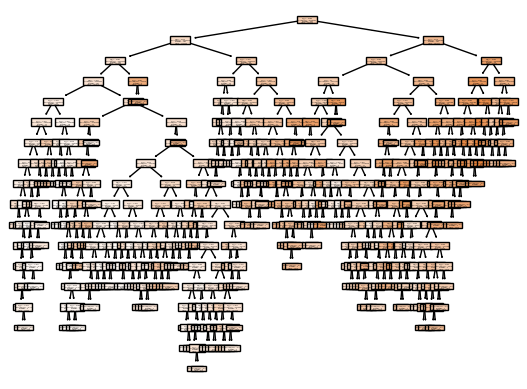

In [44]:
from sklearn import tree
plt.Figure(figsize=(25,15))
tree.plot_tree(regression,filled=True)


In [45]:
selected_model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=3,max_features='sqrt')


In [47]:
selected_model.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

In [48]:
y_pred = selected_model.predict(X_test)

In [49]:
score = r2_score(y_test,y_pred)
print("Score :",score)

Score : 0.07643069373830702
